# The first five row of the table originally obtained from telbib.eso.org 
+ The affiliations of authors are obtained from NASA ADS
+ The countries of the affiliations are interpreted from the affiliations.
+ The list of the proposal authors are obtained from ALMA Science Archive.
+ The values in the "archive" column are defined by whether any of article authors are included in the proposal authors of the project that is used in the article.
+ The values in the "archivedata" columns are the same as in the "arhive" columns, but collapsed.
+ The "region" column is a country in which the affiliation of the first author is located.
+ See Appendix to see which countries are classified to which region. Note 'EA' includs Japan, Taiwan and Korea.

In [1]:
from astroquery.alma import Alma
from astroquery import nasa_ads as na

import urllib
import xml.etree.ElementTree as ET

import pandas as pd

import numpy as np
import re

import matplotlib.pyplot as plt

df_xml = pd.read_pickle('./df_telbib_alma_aff_archive.pkl')
df_xml.head()

,authors,year,programids,bibcode,journal,almaprojcode,affiliations,countries,archive,archivedata,region
0,":Oteo, I.:Zwaan, M. A.:Ivison, R. J.:Smail, I....",2016,:2012.1.00076.S : North America...,2016ApJ...822...36O,ApJ,"[2013.1.00879.S , 2012.1.00988....","[Institute for Astronomy, University of Edinbu...","[UK, Germany, UK, UK, Germany]","[archive, archive, PI, archive, archive, archi...",PI+archive,EU
1,":Fujimoto, Seiji:Ouchi, Masami:Shibuya, Takato...",2017,:2011.0.00097.S : North America...,2017ApJ...850...83F,ApJ,"[2011.0.00097.S , 2012.1.00775....","[Institute for Cosmic Ray Research, The Univer...","[Japan, Japan, Japan, Japan]","[archive, archive, archive, archive, archive, ...",PI+archive,EA
2,":Klitsch, A.:Zwaan, M. A.:Péroux, C.:Smail, I....",2019,:2012.1.00090.S : Europe:2012.1...,2019MNRAS.482L..65K,MNRAS,"[2015.1.00330.S , 2015.1.01290....","[European Southern Observatory, Karl-Schwarzsc...","[Germany, Germany, France, UK, Germany, German...","[archive, archive, PI, archive, PI, archive, a...",PI+archive,EU
3,":Ando, Ryo:Kohno, Kotaro:Tamura, Yoichi:Izumi,...",2016,:2011.0.00017.S : Europe:2011.0...,2016PASJ...68....6A,PASJ,"[2011.0.00273.S , 2011.0.00733....","[Institute of Astronomy, The University of Tok...","[Japan, Japan, Japan, Japan, Japan, Japan]","[PI, archive, archive, archive, archive, archi...",PI+archive,EA
4,":van der Marel, Nienke:Dong, Ruobing:di France...",2019,:2011.0.00015.SV : East Asia:201...,2019ApJ...872..112V,ApJ,"[2015.1.00486.S , 2013.1.00601....","[Herzberg Astronomy and Astrophysics Programs,...","[Canada, Canada, Canada, USA, USA]","[archive, archive, archive, archive, archive, ...",PI+archive,NA


## Fig.1 
### The number of publications per region between 2012 and 2018

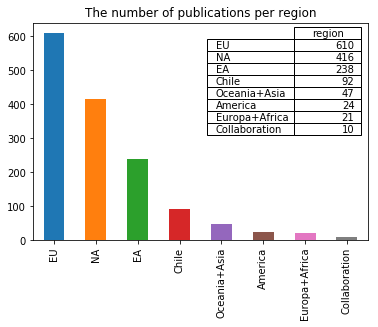

In [19]:
from pandas.plotting import table

fig, ax = plt.subplots(1, 1)

table(ax,df_xml["region"].value_counts(),
      loc='upper right', colWidths=[0.2, 0.2, 0.2])

df_xml["region"].value_counts().plot(kind="bar",
                                     title='The number of publications per region',
                                     ax=ax)

## Fig.2
### The fraction of publications per region between 2012 and 2018

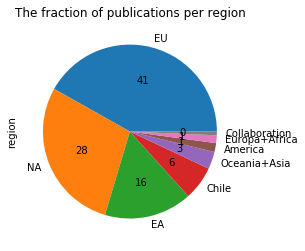

In [3]:
df_xml['region'].value_counts().plot.pie(autopct='%i',title='The fraction of publications per region')

## Table 2
### The number of publications making use of PI and archival data

In [4]:
#for df1['e'] = Series(np.random.randn(sLength), index=df1.index)

df_archive = pd.DataFrame({'All':df_xml['archivedata'].value_counts(),
    'EA':df_xml[df_xml["region"]=='EA']['archivedata'].value_counts(), 
    'NA':df_xml[df_xml["region"]=='NA']['archivedata'].value_counts(),
    'EU':df_xml[df_xml["region"]=='EU']['archivedata'].value_counts(),
    'Chile':df_xml[df_xml["region"]=='Chile']['archivedata'].value_counts()})

df_archive
#.plot(kind="pie")

,All,EA,NA,EU,Chile
PI,1083,171,307,473,73
archive,255,36,68,102,12
PI+archive,120,31,41,35,7


## Fig.3
### The fraction of publications making use of PI and/or archival data 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11cddeda0>,
      dtype=object)

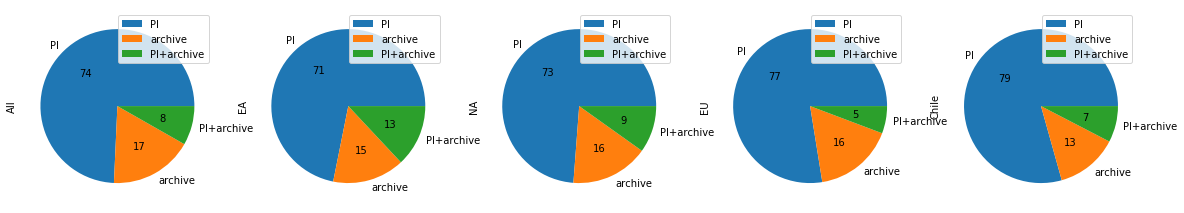

In [5]:
df_archive.plot(kind='pie',subplots=True,figsize=(20,10),autopct='%i')

## Fig.4
### The fraction of publications making use of PI and/or archival data per region.

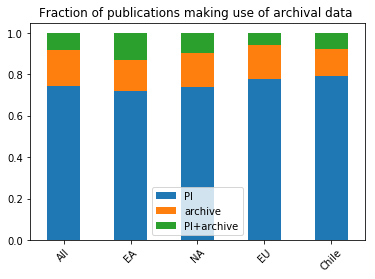

In [6]:
df_archive_transposed = (df_archive/df_archive.sum()).T
#df_archive_transposed
df_archive_transposed.plot.bar(stacked=True,rot=45,title='Fraction of publications making use of archival data ')

## Fig.5
### Evolution of fraction of publications making use of PI and/or archival data per region.

In [31]:
def evolutionpub(df,addtitle):
    tmp_dict = {}
    for year in range(2012,2020):
        tmp_dict.update({year:df[df["year"]==str(year)]['archivedata'].value_counts()})
    df_archive = pd.DataFrame(tmp_dict)
    #df_archive.plot(kind='pie',subplots=True,figsize=(30,6),autopct='%i')

    df_archive_transposed = (df_archive/df_archive.sum()).T
    #df_archive_transposed
    df_archive_transposed.plot.bar(stacked=True,rot=45,title='Evolution of fraction of publications {:}'.format(addtitle))

    df_archive_transposed = df_archive.T
    df_archive_transposed.plot.bar(stacked=True,rot=45,title='Evolution of number of publications {:}'.format(addtitle))
    
    print('Table the number of publications', addtitle)
    display(df_archive_transposed)

Table the number of publications All


,PI,PI+archive,archive
2012,6.0,1.0,12.0
2013,45.0,NaN,20.0
2014,77.0,4.0,16.0
2015,96.0,9.0,42.0
2016,164.0,14.0,58.0
2017,269.0,22.0,47.0
2018,295.0,46.0,38.0
2019,131.0,24.0,22.0


Table the number of publications EA


,PI,PI+archive,archive
2012,2.0,1.0,1.0
2013,7.0,NaN,NaN
2014,12.0,3.0,1.0
2015,14.0,2.0,7.0
2016,24.0,8.0,11.0
2017,42.0,5.0,11.0
2018,50.0,7.0,4.0
2019,20.0,5.0,1.0


Table the number of publications EU


,PI,PI+archive,archive
2012,2.0,NaN,6.0
2013,17.0,NaN,7.0
2014,28.0,1.0,8.0
2015,40.0,3.0,15.0
2016,77.0,2.0,24.0
2017,125.0,6.0,18.0
2018,129.0,11.0,15.0
2019,55.0,12.0,9.0


Table the number of publications NA


,PI,PI+archive,archive
2012,2.0,NaN,3.0
2013,17.0,NaN,10.0
2014,29.0,NaN,4.0
2015,29.0,3.0,12.0
2016,47.0,3.0,10.0
2017,71.0,8.0,11.0
2018,81.0,23.0,12.0
2019,31.0,4.0,6.0


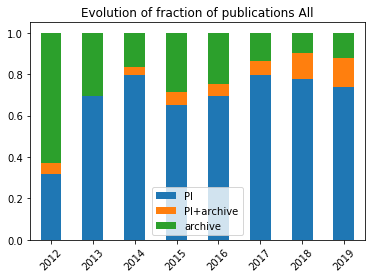

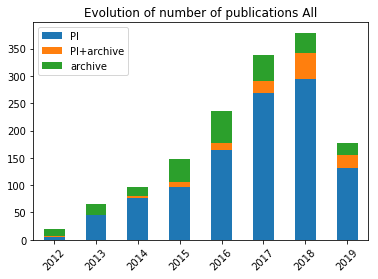

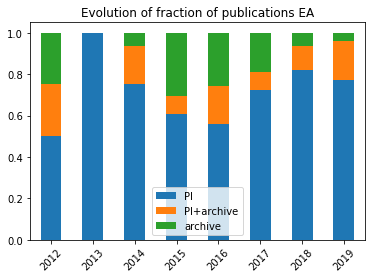

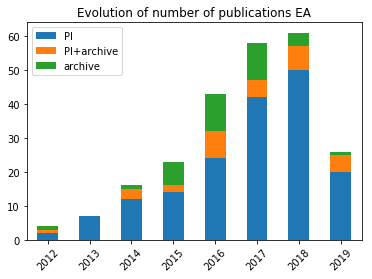

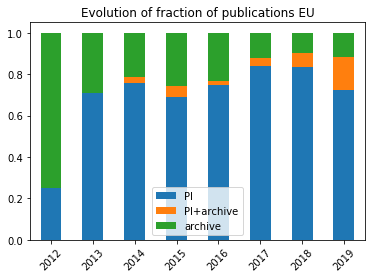

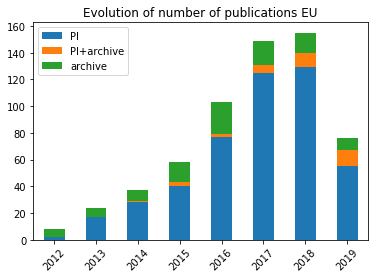

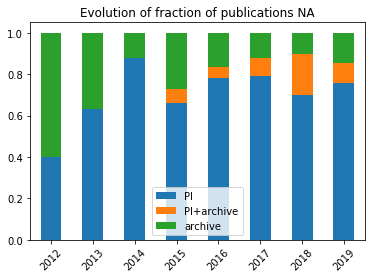

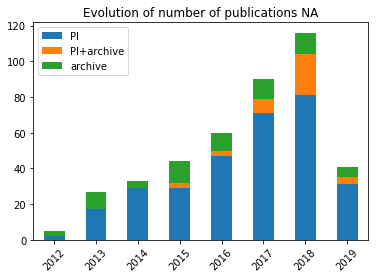

In [32]:
evolutionpub(df_xml,'All')

df_xml_trim = df_xml[df_xml["region"]=='EA']
evolutionpub(df_xml_trim,'EA')

df_xml_trim = df_xml[df_xml["region"]=='EU']
evolutionpub(df_xml_trim,'EU')

df_xml_trim = df_xml[df_xml["region"]=='NA']
evolutionpub(df_xml_trim,'NA')

# Appendix
## A List of countries by regional classification

In [22]:
appendix_df = pd.read_pickle('./df_region.pkl')
print('EA\n',appendix_df.index[appendix_df[0]=='EA'])
print('EU (=ESO)\n',appendix_df.index[appendix_df[0]=='EU'])
print('NA\n',appendix_df.index[appendix_df[0]=='NA'])

EA
 Index(['Taiwan', 'Korea', 'Japan'], dtype='object')
EU (=ESO)
 Index(['Belgium', 'Poland', 'Austria', 'Germany', 'UK', 'Denmark', 'Spain',
       'Netherlands', 'France', 'Portugal', 'Czech Republic', 'Sweden',
       'Switzerland', 'Ireland', 'Italy'],
      dtype='object')
NA
 Index(['Canada', 'USA'], dtype='object')


## The fraction of publications per Asian country

/Users/rmiura/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


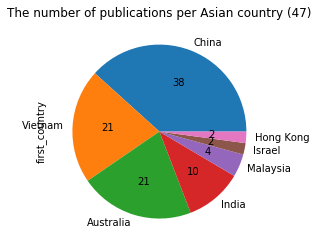

In [107]:
df_asia = df_xml[df_xml['region']=='Oceania+Asia']
tmp = []
for i in df_asia.index:
    #print(i,end='')
    tmp.append(df_asia[df_asia.index==i]['countries'].values[0][0])
df_asia['first_country'] = tmp
df_asia['first_country'].value_counts().plot.pie(autopct='%i',
    title='The fraction of publications per Asian country ({:})'.format(len(df_asia)))


## The fraction of publications making use of PI/archive data for Asian countries

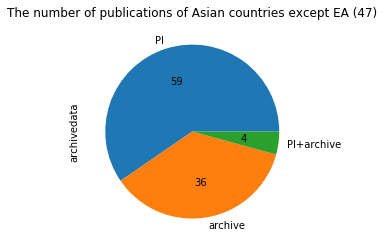

In [101]:
df_asia['archivedata'].value_counts().plot.pie(autopct='%i',
    title='The number of publications of Asian countries except EA ({:})'.format(len(df_ea)))